# Fashion Mnist Dataset

## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

2024-05-16 07:14:44.929275: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 07:14:44.933022: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 07:14:44.987752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 07:14:46.175359: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Load data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(full_x_train, full_y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
full_x_train.shape

(60000, 28, 28)

In [5]:
full_x_train.dtype

dtype('uint8')

In [6]:
type(full_x_train)

numpy.ndarray

In [7]:
# x_valid, x_train = full_x_train[:5000]/255., full_x_train[5000:]/255. no lugar de normalizar assim, substituí por BN como 1ª camada
x_valid, x_train = full_x_train[:5000], full_x_train[5000:]
y_valid, y_train = full_y_train[:5000], full_y_train[5000:]

In [8]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## NN architecture

In [9]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) # converte cada imagem em uma matriz 1d (equivale a .reshape(-1, 1)). Nâo inclui o tamanho do batch
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation='relu')) # já inicializa pesos aleatoriamente para quebrar a simetria (necessário ao gradiente descendente)
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax')) # softmax pq as classes são exclusivas

/home/lara/git/neuralnets_lab/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

- Os parâmetros não treináveis desse modelo são os referentes as médias móveis calculadas durante o treinamento para média e desvio padrão (que serão usados ao fazer predições).

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Dense name=dense_2, built=True>]

In [21]:
weights, biases = model.layers[2].get_weights()

In [22]:
weights.shape

(784, 300)

In [23]:
# o batch size por padrão é 32
model.compile(loss="sparse_categorical_crossentropy", # pq temos rótulos esparsos (somente 1 de 0 a 9) e as classes são exclusivas
              optimizer="sgd", # stochastic gradient descent
              metrics=["accuracy"])

## Train

In [24]:
history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_valid, y_valid)) # passar o conjunto de validação é opcional

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7670 - loss: 0.6860 - val_accuracy: 0.8574 - val_loss: 0.4369
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8551 - loss: 0.4076 - val_accuracy: 0.8722 - val_loss: 0.4244
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8726 - loss: 0.3581 - val_accuracy: 0.8784 - val_loss: 0.3593
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8818 - loss: 0.3349 - val_accuracy: 0.8812 - val_loss: 0.4360
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8871 - loss: 0.3154 - val_accuracy: 0.8816 - val_loss: 0.3981
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8949 - loss: 0.2912 - val_accuracy: 0.8840 - val_loss: 0.3728
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8983 - loss: 0.2776 - val_accuracy: 0.8866 - val_loss: 0.3736
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9031 - loss: 0.265

## Evaluate

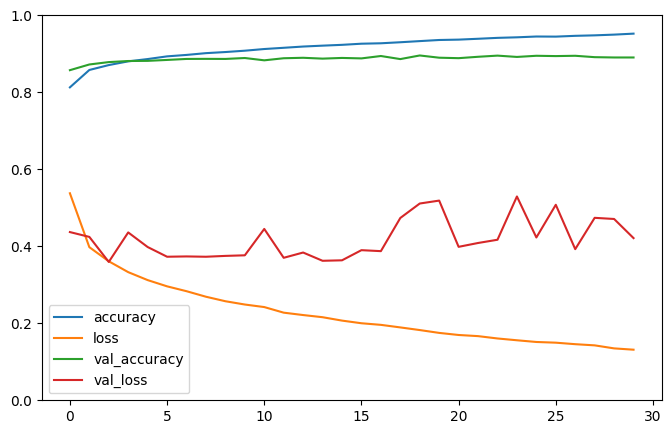

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

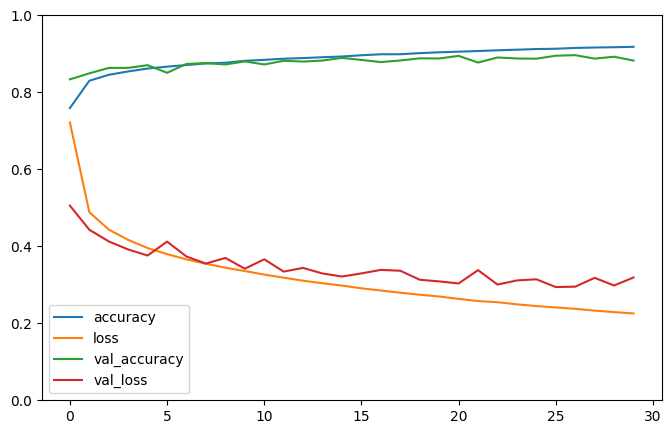

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

- O erro de validação é calculado no fim de cada época, enquanto o erro de treinamento é calculado usando uma média durante cada época.

In [32]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8846 - loss: 0.4145


[0.41865482926368713, 0.8831999897956848]

In [29]:
# Predições
x_new = x_test[:1]
y_proba = model.predict(x_new)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[4.3513403e-08, 1.6564876e-07, 9.2743903e-08, 1.4509747e-06,
        9.5004850e-08, 8.0830569e-04, 1.1058305e-06, 5.9570174e-04,
        1.1411639e-06, 9.9859184e-01]], dtype=float32)

In [31]:
y_proba.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)